# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [14]:
import seaborn as sns


In [165]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("/Users/jacklobe/lighthouse/w6/loaninfo.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [16]:
#before taking a smaller csv from flgihts i want to deal with missing cols that are too high to combat 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
df.Dependents.unique()


array(['0', '1', '2', '3+', nan], dtype=object)

In [18]:
df.shape
#super small data 
#our problem is for prediction of loan outcome, so classification

(614, 13)

In [19]:
df.describe(include='int')

,ApplicantIncome
count,614.000000
mean,5403.459283
std,6109.041673
min,150.000000
25%,2877.500000
50%,3812.500000
75%,5795.000000
max,81000.000000


In [20]:
df.describe(include='float')

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,592.000000,600.00000,564.000000
mean,1621.245798,146.412162,342.00000,0.842199
std,2926.248369,85.587325,65.12041,0.364878
min,0.000000,9.000000,12.00000,0.000000
25%,0.000000,100.000000,360.00000,1.000000
50%,1188.500000,128.000000,360.00000,1.000000
75%,2297.250000,168.000000,360.00000,1.000000
max,41667.000000,700.000000,480.00000,1.000000


In [21]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001765,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [22]:
df.drop('Loan_ID', axis=1, inplace=True)#we dont care about the id in this context not important for classifier

In [23]:
#check for duplicate rows
df.duplicated().any()

False

The percentage of Y class : 0.6872964169381107
The percentage of N class : 0.3127035830618892


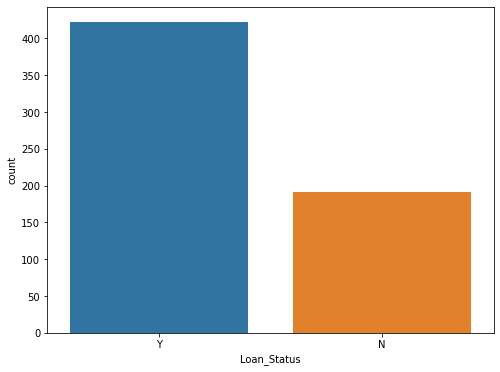

In [24]:
#for classifiers there is always inbalanced data, this doesnt seem to be any exception
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status']);

print(f'The percentage of Y class : {(df.Loan_Status.value_counts()[0] / len(df))}')
print(f'The percentage of N class : {(df.Loan_Status.value_counts()[1] / len(df))}')

In [25]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

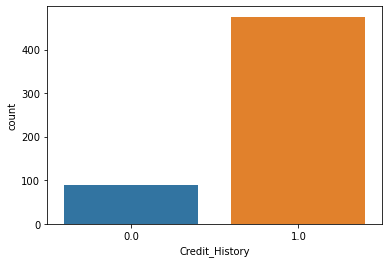

In [26]:
sns.countplot(df.Credit_History)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


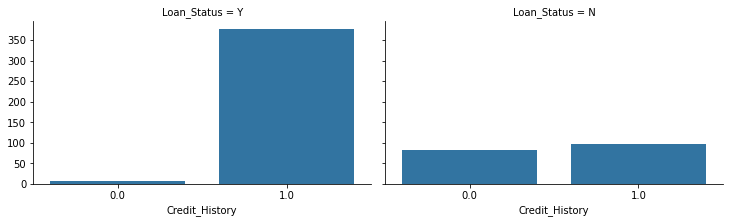

In [27]:
#first thing that creditors may look for is loan status, and without it how will they give loans... 
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

<AxesSubplot:xlabel='Credit_History', ylabel='LoanAmount'>

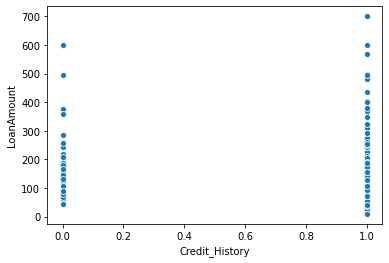

In [28]:
sns.scatterplot(x='Credit_History',y='LoanAmount',data=df)

In [29]:
df.LoanAmount

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


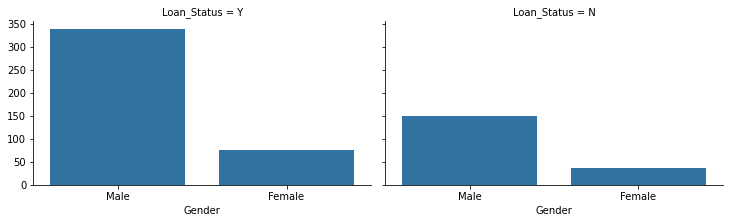

In [30]:

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender');

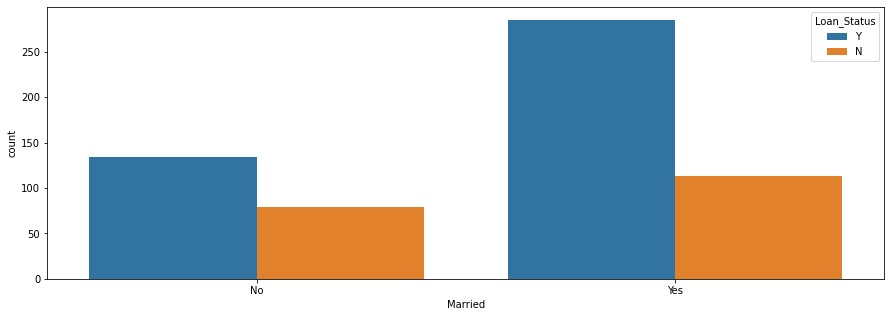

In [31]:
# Married
plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=df);


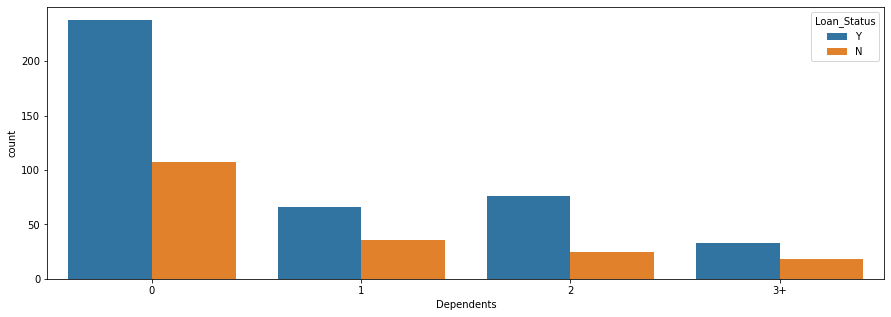

In [32]:
# Dependents

plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df);

# first if Dependents = 0 , we got higher chance to get a loan ((very hight chance))
# good feature

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


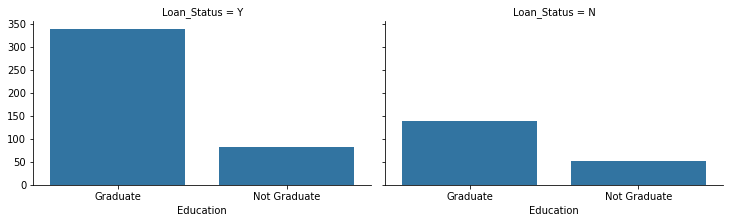

In [33]:

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education');

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


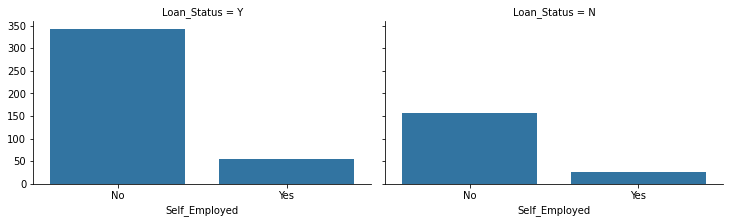

In [34]:

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Self_Employed');

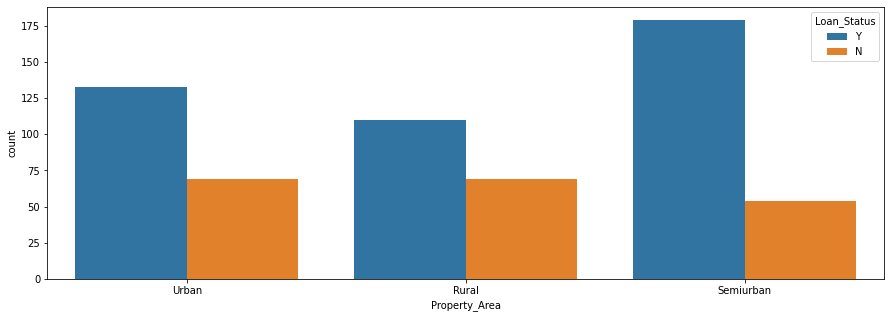

In [35]:

plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df);

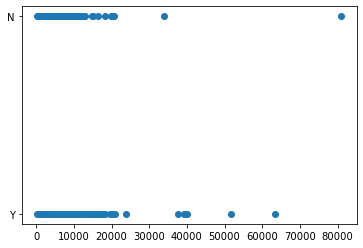

In [36]:

plt.scatter(df['ApplicantIncome'], df['Loan_Status']);
#most suprising one without any pattern 

In [37]:
df.groupby('Loan_Status').median() # median because Not affected with outliers
#an easy way to see while applicant income doesnt matter, coapplicant income will 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,129.0,360.0,1.0
Y,3812.5,1239.5,126.0,360.0,1.0


In [38]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

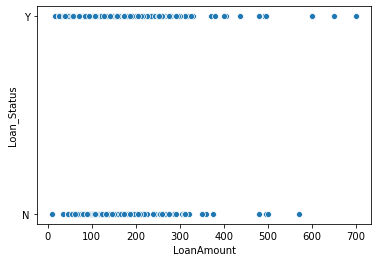

In [39]:
sns.scatterplot(x='LoanAmount',y='Loan_Status',data=df)

In [40]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [41]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Look at some basic statistics for numerical variables.

<AxesSubplot:xlabel='ApplicantIncome'>

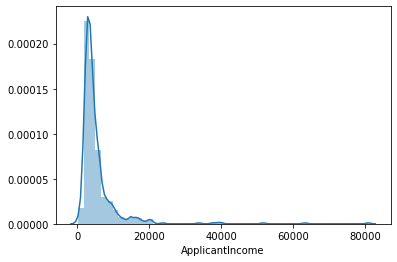

In [42]:
sns.distplot(df.ApplicantIncome)

<AxesSubplot:xlabel='CoapplicantIncome'>

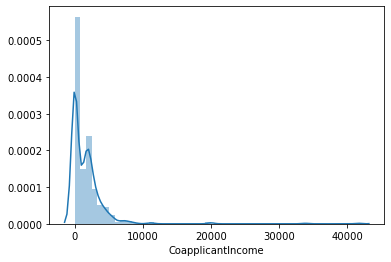

In [43]:
sns.distplot(df.CoapplicantIncome)

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [44]:
#done above

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [45]:
#done above 

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.




Look at box plots to understand the distributions. 

Look at the distribution of income segregated  by `Education`

<Figure size 1080x360 with 0 Axes>

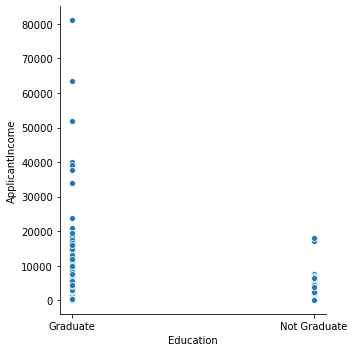

In [46]:

plt.figure(figsize=(15,5))
sns.relplot(x='Education', y='ApplicantIncome', data=df);

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:xlabel='LoanAmount'>

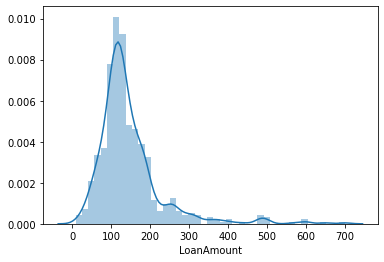

In [47]:
sns.distplot(df.LoanAmount)

<AxesSubplot:xlabel='LoanAmount'>

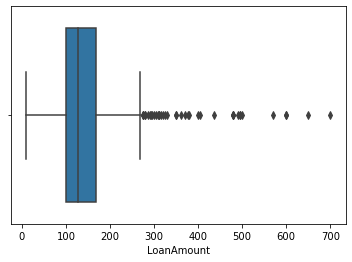

In [48]:
sns.boxplot(df.LoanAmount)

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



In [49]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [50]:
df.Credit_History.dtype

dtype('float64')

In [51]:
#Credit_History is a weird one, how can we deal with missing values? I feel as though this would be best represented
#by putting empty, which will inturn be zero as in the client did not provide their credit history
df.Credit_History= df.Credit_History.fillna(0)


In [52]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [53]:
#self employed is another catagorical one that is weird to fill, fitting with cat in this case where they did not
#provide employment type, assume at first add it as a type and then we can see how it affects classification
df.Self_Employed=df.Self_Employed.fillna('Empty')

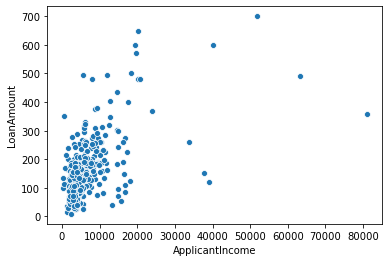

In [54]:
#LoanAmount
#how often are term and loan_amount both out
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=df) #looking at this not wise to make a mx+b thing
#just fill with median
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.median())

In [55]:
#Dependents
df.Dependents.unique()
#get rid of three plus make it three, then fill the na cols with empty


array(['0', '1', '2', '3+', nan], dtype=object)

In [56]:
df['Dependents'] = df['Dependents'].replace('3+', '3')


In [57]:
df.Dependents=df.Dependents.fillna('Empty')

In [58]:
#Loan_Amount_Term, lets fill this with most often

df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median())

In [59]:
#lets also divide loan term by 12


In [60]:
df.Loan_Amount_Term.median()

360.0

In [61]:
#Gender
#many people filling out forms may leave the gender empty or not identify as male or female 
#consider this to be empty and not male or female
df.Gender=df.Gender.fillna('Empty')

In [62]:
#Married 
#since long term we are doing pipeline, i think we can impute the catagorical variables as empty in the broader 
#and in this instance and most instances it is fairly fitting
df.Married=df.Married.fillna('Empty')

Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [63]:
################################
#TAKE 1 SIMPLE CLEAN MEDIAN ENCODING AND MISSING VALUES NOTHING FANCY YET

cat_data = []
num_data = []
for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])

In [64]:
cat_data=pd.DataFrame(cat_data).transpose()

In [65]:
num_data=pd.DataFrame(num_data).transpose()

In [66]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [67]:


cat_data.isnull().sum().any() # no more missing data

False

In [68]:

num_data.isnull().sum().any() # no more missing data 

False

In [69]:
#for numeric data we need to transform all float to int because we want all in
for i in num_data:
    num_data[i]=num_data[i].astype('int')


In [70]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
cat_data.head()


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [72]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [73]:
df = pd.concat([cat_data, num_data], axis=1)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

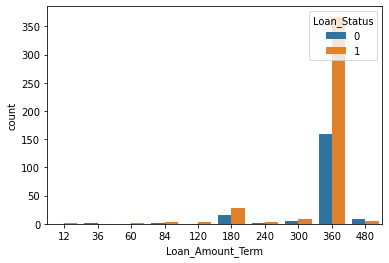

In [788]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

In [789]:
df.LoanAmount.describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
from sklearn.model_selection import train_test_split

In [7]:
X=df.drop('Loan_Status',axis=1)
y=df.Loan_Status

In [8]:
##################
#pickle all cat_variables missing as empty
#LoanAmount and Loan_Term median
#credithistory as zero
#RobustScaler applicant and coapplicant income 

#LoanTerm/12

#drop gender


#label encode all cat variables



 
#put train test split before the pipline

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2)



In [9]:
x_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,LP002139,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban
118,LP001421,Male,Yes,0,Graduate,No,5568,2142.0,175.0,360.0,1.0,Rural
363,LP002178,Male,Yes,0,Graduate,No,3013,3033.0,95.0,300.0,NaN,Urban
170,LP001581,Male,Yes,0,Not Graduate,NaN,1820,1769.0,95.0,360.0,1.0,Rural
538,LP002739,Male,Yes,0,Not Graduate,No,2917,536.0,66.0,360.0,1.0,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...
236,LP001786,Male,Yes,0,Graduate,NaN,5746,0.0,255.0,360.0,NaN,Urban
437,LP002401,Male,Yes,0,Graduate,No,2213,1125.0,NaN,360.0,1.0,Urban
60,LP001205,Male,Yes,0,Graduate,No,2500,3796.0,120.0,360.0,1.0,Urban
84,LP001275,Male,Yes,1,Graduate,No,3988,0.0,50.0,240.0,1.0,Urban


In [76]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

# Using own function in Pipeline
def numFeat(data):
    return data[num_feats]

def catFeat(data):
    return data[cat_feats]

In [77]:
keep_num = FunctionTransformer(numFeat)
keep_cat = FunctionTransformer(catFeat)

In [616]:
def convDependents

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [72]:
from sklearn.pipeline import Pipeline

In [ ]:
def dep3()

In [95]:
x_train

,Loan_ID,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
379,379,2,2,0,1,2,0.541045,-0.517358,130,30.0,1
363,363,2,0,0,1,2,-0.274036,0.802917,95,25.0,0
213,213,2,3,1,2,0,0.647986,-0.517358,130,30.0,1
25,25,2,0,0,2,1,1.970009,-0.517358,191,30.0,1
235,235,2,1,0,1,0,0.578406,0.031124,170,30.0,1
...,...,...,...,...,...,...,...,...,...,...,...
370,370,1,0,0,2,1,4.094773,-0.517358,55,30.0,1
334,334,2,1,0,2,2,2.063582,0.280553,182,15.0,1
355,355,1,4,0,1,2,0.000171,-0.517358,116,15.0,1
362,362,2,0,0,1,2,0.321337,0.498204,130,30.0,1


In [66]:
from feature_engine import missing_data_imputers as msi
from sklearn.pipeline import Pipeline as pipe
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [10]:
from sklearn.preprocessing import FunctionTransformer

# Using own function in Pipeline
def numFeat(data):
    return data[num_feats]

def catFeat(data):
    return data[cat_feats]

In [11]:
keep_num = FunctionTransformer(numFeat)
keep_cat = FunctionTransformer(catFeat)

In [96]:
rf=rf_model

In [90]:
pipe=Pipeline([('catFeat',keep_cat),('preprocessing',col_transformer),('rf',rf)])

In [80]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
cat

In [35]:
X

,ApplicantIncome,CoapplicantIncome
0,5849,0
1,4583,1508
2,3000,0
3,2583,2358
4,6000,0
...,...,...
609,2900,0
610,4106,0
611,8072,240
612,7583,0


In [34]:
X=df[['ApplicantIncome','CoapplicantIncome']]

In [74]:
from sklearn.preprocessing import RobustScaler

In [75]:
Transformer=RobustScaler().fit(df[['ApplicantIncome','CoapplicantIncome']])

In [76]:
df[['ApplicantIncome','CoapplicantIncome']]=Transformer.transform(df[['ApplicantIncome','CoapplicantIncome']])

In [77]:
Transformer=RobustScaler().fit(df[['ApplicantIncome','CoapplicantIncome']])
df['LoanAmount']=Transformer.transform(df['LoanAmount'])

ValueError: Expected 2D array, got 1D array instead:
array=[128. 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 120. 201.  74. 106. 114. 320. 128. 100. 144. 184. 110.  80.  47.
  75. 134.  96.  88.  44. 144. 120. 144. 100. 120. 112. 134. 286.  97.
  96. 135. 180. 144. 120.  99. 165. 128. 116. 258. 126. 312. 125. 136.
 172.  97.  81.  95. 187. 113. 176. 110. 180. 130. 111. 128. 167. 265.
  50. 136.  99. 104. 210. 175. 131. 188.  81. 122.  25. 128. 137.  50.
 115. 131. 133. 151. 128. 128. 160. 100. 225. 120. 216.  94. 136. 139.
 152. 128. 118. 185. 154.  85. 175. 259. 180.  44. 137.  81. 194.  93.
 370. 128. 160. 182. 650.  74.  70.  25. 102. 290.  84.  88. 242. 129.
 185. 168. 175. 122. 187. 100.  70.  30. 225. 125. 118. 152. 244. 113.
  50. 600. 160. 187. 120. 255.  98. 275. 121. 158.  75. 182. 112. 129.
  63. 200.  95. 700.  81. 187.  87. 116. 101. 495. 116. 102. 180.  67.
  73. 260. 108. 120.  66.  58. 168. 188.  48. 164. 160.  76. 120. 170.
 187. 120. 113.  83.  90. 166. 128. 135. 124. 120.  80.  55.  59. 127.
 214. 128. 240. 130. 137. 100. 135. 131.  72. 127.  60. 116. 144. 175.
 128. 170. 138. 210. 158. 200. 104.  42. 120. 280. 140. 170. 255. 122.
 112.  96. 120. 140. 155. 108. 123. 120. 112. 137. 123.  90. 201. 138.
 104. 279. 192. 255. 115.  94. 304. 128. 330. 134. 155. 120. 128. 151.
 150. 160. 135.  90.  30. 136. 126. 150.  90. 115. 207.  80. 436. 124.
 158. 112.  78.  54. 128.  89.  99. 120. 115. 187. 139. 127. 134. 143.
 172. 110. 200. 135. 151. 113.  93. 105. 132.  96. 140. 128. 135. 104.
 480. 185.  84. 111.  56. 144. 159. 111. 120.  88. 112. 155. 115. 124.
 128. 132. 300. 376. 130. 184. 110.  67. 117.  98.  71. 490. 182.  70.
 160. 176. 128.  71. 173.  46. 158.  74. 125. 160. 152. 126. 259. 187.
 228. 308.  95. 105. 130. 116. 165.  67. 100. 200.  81. 236. 130.  95.
 141. 133.  96. 124. 175. 570.  55. 155. 380. 111. 110. 120. 130. 130.
  71. 130. 128. 296. 156. 128. 100. 113. 132. 128. 136. 125. 185. 275.
 120. 113. 113. 135.  71.  95. 109. 103.  45.  65. 103.  53. 194. 115.
 115.  66. 152. 360.  62. 160. 218. 110. 178.  60. 160. 239. 112. 138.
 138.  80. 100. 110.  96. 121.  81. 133.  87.  60. 150. 105. 405. 143.
 100. 128.  50. 128. 187. 138. 187. 180. 148. 152. 175. 130. 110.  55.
 150. 190. 125.  60. 149.  90.  84.  96. 118. 173. 136. 160. 160. 128.
 153. 132.  98. 140.  70. 110.  98. 110. 162. 113. 100.  93. 162. 150.
 230. 132.  86. 128. 154. 113. 128. 234. 246. 131.  80. 500. 160.  75.
  96. 186. 110. 225. 119. 105. 107. 111.  95. 209. 113. 100. 208. 138.
 124. 243. 480.  96. 188.  40. 100. 250. 148.  70. 311. 150. 113. 123.
 185.  95.  45.  55. 100. 480. 128. 400. 110. 161.  94. 130. 216. 100.
 110. 196. 125. 126. 324. 107.  66. 157. 140.  99.  95. 128. 102. 155.
  80. 145. 103. 110. 128. 128. 158. 181. 132.  26.  84. 260. 162. 182.
 108. 600. 211. 132. 258. 120.  70. 123.   9. 104. 186. 165. 275. 187.
 150. 108. 136. 110. 107. 161. 205.  90.  36.  61. 146. 172. 104.  70.
  94. 106.  56. 205. 292. 142. 260. 110. 187.  88. 180. 192. 350. 155.
 128. 172. 496. 128. 173. 157. 108.  71.  40. 253. 187. 133.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [790]:
df.LoanAmount=np.log(df.LoanAmount)

In [791]:
df.ApplicantIncome=np.log(df.ApplicantIncome)

In [792]:
df.CoapplicantIncome=np.log(df.CoapplicantIncome+1)

Combine both incomes as total income and take a log transformation of the same.

In [318]:
df['Total_Income']=np.log(df.ApplicantIncome+df.CoapplicantIncome)

In [319]:
df=df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)

In [78]:
df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2,1,0,0,1,2,1,0.698029,-0.517358,128,360,1
1,2,2,1,0,1,0,0,0.264096,0.139079,128,360,1
2,2,2,0,0,2,2,1,-0.278492,-0.517358,66,360,1
3,2,2,0,1,1,2,1,-0.421422,0.509087,120,360,1
4,2,1,0,0,1,2,1,0.749786,-0.517358,141,360,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,0,1,0,1,-0.312768,-0.517358,71,360,1
610,2,2,3,0,1,0,1,0.100600,-0.517358,40,180,1
611,2,2,1,0,1,2,1,1.459983,-0.412885,253,360,1
612,2,2,2,0,1,2,1,1.292374,-0.517358,187,360,1


In [79]:
for i in df:
    df[i]=df[i].astype('float')

## 4. Building a Predictive Model

In [80]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [81]:
X=df.drop(['Loan_Status','Gender'],axis=1)
y=df.Loan_Status

In [82]:
X.Loan_Amount_Term=X.Loan_Amount_Term/12

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [84]:
from sklearn.ensemble import RandomForestClassifier
import pprint

In [85]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,10,20]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [86]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10, 20],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [95]:
rf_model

RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=5,
                       n_estimators=1400)

In [87]:
rf_model = RandomForestClassifier()
rf_model.set_params(**rf_random.best_params_)

RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=5,
                       n_estimators=1400)

In [88]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=5,
                       n_estimators=1400)

In [89]:
y_pred=rf_model.predict(x_test)

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred)

array([[20, 17],
       [ 9, 77]])

Try paramater grid search to improve the results

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7886178861788617

In [92]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.7179446888749215

In [93]:
precision_score(y_test,y_pred)

NameError: name 'precision_score' is not defined

In [94]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.8555555555555555

In [608]:
import joblib
joblib_file = "RF_model.pkl"  
joblib.dump(rf_model, joblib_file)

['RF_model.pkl']

In [593]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold

In [594]:
xgbparams= {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


In [595]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)


In [596]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True)

random_search = RandomizedSearchCV(xgb, param_distributions=xgbparams, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(x_train,y_train), verbose=3 )

# Here we go

random_search.fit(x_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[23:00:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.9s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fa80028c550>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None, silent=True,
                                           subsa

In [597]:
xg_model = XGBClassifier()
xg_model.set_params(**random_search.best_params_)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=1.0, gamma=2, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=0.6, tree_method=None,
              validate_parameters=None, verbosity=None)

In [598]:
xg_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [599]:
y_pred=xg_model.predict(x_test)

In [600]:
confusion_matrix(y_test,y_pred)

array([[14, 20],
       [11, 78]])

In [601]:
accuracy_score(y_test,y_pred)

0.7479674796747967

In [602]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.7959183673469388

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [117]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [114]:
df.columns.tolist()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from feature_engine import missing_data_imputers as msi
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [4]:

df = pd.read_csv("/Users/jacklobe/lighthouse/w6/loaninfo.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1, 'N':0})

In [6]:
y = df.pop('Loan_Status')
X = df.drop('Loan_ID',axis=1)

In [7]:
class DataframeFunctionTransformer:
    def __init__(self, func):
        self.func = func
    def transform(self, input_df, **transform_params):
        return self.func(input_df)
    def fit(self, X, y=None, **fit_params):
        return self
def create_total_income_feature(input_df):
    input_df['total_income'] = input_df['ApplicantIncome'] + input_df['CoapplicantIncome']
    return input_df
def to_dataframe(array):
    columns= ['Gender','Dependents','Married','Self_Employed','LoanAmount',
               'Loan_Amount_Term','Credit_History','Education','ApplicantIncome',
               'CoapplicantIncome','Property_Area','total_income']
    return pd.DataFrame(array, columns = columns)

In [237]:
X=df.drop('Loan_Status',axis=1)
y=df.Loan_Status

In [238]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [203]:
x_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
225,LP001751,Male,Yes,0,Graduate,No,3250,0.0,170.0,360.0,1.0,Rural
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban
572,LP002855,Male,Yes,2,Graduate,No,16666,0.0,275.0,360.0,1.0,Urban
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
66,LP001228,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
442,LP002418,Male,No,3+,Not Graduate,No,4707,1993.0,148.0,360.0,1.0,Semiurban
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban
276,LP001903,Male,Yes,0,Graduate,No,3993,3274.0,207.0,360.0,1.0,Semiurban
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban


In [118]:
cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
num_feats = df.dtypes[~df.dtypes.index.isin(cat_feats)].index.tolist()


In [119]:
cat_feats

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [135]:
x_train

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
458,LP002472,No,2,Graduate,No,4354,0.0,136.0,360.0,1.0,Rural
420,LP002348,Yes,0,Graduate,No,5829,0.0,138.0,360.0,1.0,Rural
492,LP002571,No,0,Not Graduate,No,3691,0.0,110.0,360.0,1.0,Rural
387,LP002243,Yes,0,Not Graduate,No,3010,3136.0,NaN,360.0,0.0,Urban
335,LP002106,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
16,LP001034,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban
372,LP002201,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural
66,LP001228,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban
385,LP002237,No,1,Graduate,NaN,3667,0.0,113.0,180.0,1.0,Urban


In [126]:
class DataframefunctionTransformer():
    def __init__(self,func):
        self.func=func
    def transform(self,input_df,**transform_params):
        return self.func(input_df)
    def fit(self,X,y=None,**fit_params):
        return(self)

In [141]:
def process_dataframe(input_df):
    input_df.drop(['Loan_ID','Gender'],axis=1,inplace=True)
    return input_df

In [142]:
pipe = pipe([
    # add a binary variable to indicate missing information for the 2 variables below
    

    # replace NA by the median in the 3 variables below, they are numerical
    ('continuous_var_median_imputer', msi.MeanMedianImputer(imputation_method='median', variables = ['Loan_Amount_Term', 'LoanAmount', 'MasVnrArea'])),

    # replace NA by adding the label "Missing" in categorical variables (transformer will skip those variables where there is no NA)
    ('categorical_imputer', msi.CategoricalVariableImputer(variables = cat_feats)),

    # median imputer
    # to handle those, I will add an additional step here
    ('zero_imputer', SimpleImputer(strategy='constant',fill_value=0, variables = 'credithistory')),
    ('robust_scaler',RobustScaler(),['ApplicantIncome','CoapplicantIncome']),
    ('le', LabelEncoder(),'')
     ])



In [ ]:
LabelEncoder(),['Loan_ID','Married','Dependents','Education','Self_Employed',
 'Property_Area',
 'Loan_Status'])

In [222]:
zero_transformer=ColumnTransformer(transformers=('zero_imputer', SimpleImputer(strategy='constant',fill_value=0)))

In [ ]:
ColumnTransformer(['fillna', SimpleImputer(strategy='most_frequent'),['Dependents']]),
ColumnTransformer()

In [ ]:
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1, 'N':0})

In [179]:
cat_transformer=ColumnTransformer(transformers=[('categorical_imputer', msi.CategoricalVariableImputer(variables = ['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']))])

In [180]:
Robust_transformer=ColumnTransformer(transformers=[('robust_scaler',RobustScaler(),['ApplicantIncome','CoapplicantIncome'])])

In [181]:
cont_transformer=ColumnTransformer(transformers=[('continuous_var_median_imputer', msi.MeanMedianImputer(imputation_method='median', variables = ['Loan_Amount_Term', 'LoanAmount']))])


In [223]:
pipe=Pipeline([('zeros',zero_transformer)])

In [ ]:
pipe=Pipeline([('droprows',DataframefunctionTransformer(process_dataframe)),('cont_var',cont_transformer),('cat imputer',cat_transformer),('zeros',zero_transformer),('scaler',Robust_transformer),('rf',RandomForestClassifier())])

In [231]:
fillna_trans=ColumnTransformer([
                                ('fillna_mode' , SimpleImputer(strategy="most_frequent"),['Dependents','Education','Property_Area']),
                                ('fillna_No' , SimpleImputer(strategy="constant",fill_value='No'),['Married','Self_Employed','Credit_History']),
                                ('fillna_median' , SimpleImputer(strategy="median"),['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])
                               ])

In [8]:
fillna_trans = ColumnTransformer([
     ('fillna_mode', SimpleImputer(strategy="most_frequent"), ['Gender','Dependents']),
     ('fillna_No', SimpleImputer(strategy='constant', fill_value='No'), ['Married', 'Self_Employed']),
     ('fillna_mean', SimpleImputer(strategy='mean'), ['LoanAmount','Loan_Amount_Term']),
     ('fillna_zero', SimpleImputer(strategy='constant',fill_value=0), ['Credit_History'])],
     remainder='passthrough')

In [11]:
log_trans = ColumnTransformer([
     ('log_trans', FunctionTransformer(np.log), ['LoanAmount','total_income'])],
     remainder='passthrough')

In [10]:
from sklearn.preprocessing import FunctionTransformer

In [12]:
preprocessing = Pipeline([
    ('total_income', DataframeFunctionTransformer(create_total_income_feature)),
    ('fillna_trans', fillna_trans),
    ('to_dataframe', DataframeFunctionTransformer(to_dataframe)),
    ('log_trans', log_trans)
])

In [16]:
pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('encodig', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('scaling', MinMaxScaler()),
    ('rf', RandomForestClassifier(n_estimators=1000))
])

In [14]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {"scaling": [MinMaxScaler(),StandardScaler()],
              'rf__n_estimators': [10,100,1000],
              'rf__max_depth': [2, 5, None],
              'rf__min_samples_split': [2,10,30]}
# create a Grid Search object
grid_search = GridSearchCV(pipeline, param_grid, n_jobs = -1, verbose=10, refit=True)
# fit the model and tune parameters
grid_search.fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1990s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 270 out

TypeError: loop of ufunc does not support argument 0 of type float which has no callable log method

In [15]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [233]:
Scaling=ColumnTransformer(['RobustScaler',RobustScaler(),['ApplicantIncome','CoapplicantIncome']])

In [ ]:
pipe=pipeline()

In [253]:
preprocessing = Pipeline([
    ('fillna_trans', fillna_trans)])

In [260]:
preprocessing.fit(x_train,y_train)

Pipeline(steps=[('fillna_trans',
                 ColumnTransformer(transformers=[('fillna_mode',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Dependents', 'Education',
                                                   'Property_Area']),
                                                 ('fillna_No',
                                                  SimpleImputer(fill_value='No',
                                                                strategy='constant'),
                                                  ['Married', 'Self_Employed',
                                                   'Credit_History']),
                                                 ('fillna_median',
                                                  SimpleImputer(strategy='median'),
                                                  ['ApplicantIncome',
                                                   'Coapplican

In [285]:
x_train

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
174,Yes,0,Not Graduate,Yes,4344,736.0,87.0,360.0,1.0,Semiurban
281,Yes,0,Graduate,No,3927,800.0,112.0,360.0,1.0,Semiurban
411,Yes,0,Graduate,NaN,6256,0.0,160.0,360.0,NaN,Urban
189,Yes,0,Graduate,No,9328,0.0,188.0,180.0,1.0,Rural
273,Yes,0,Graduate,No,2620,2223.0,150.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...
417,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban
76,No,0,Graduate,No,3750,4750.0,176.0,360.0,1.0,Urban
534,No,0,Not Graduate,Yes,18165,0.0,125.0,360.0,1.0,Urban
178,Yes,1,Graduate,No,3750,0.0,116.0,360.0,1.0,Semiurban


In [289]:
le=LabelEncoder()

le.fit(y_train)
y_train=le.transform(y_train)

In [280]:
pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('encodig', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('scaling', MinMaxScaler()),
    ('rf', RandomForestClassifier(n_estimators=1000))
])

In [283]:
param_grid = {"scaling": [MinMaxScaler(),StandardScaler(),RobustScaler()],
              'rf__n_estimators': [10,100,1000],
              'rf__max_depth': [2, 5, None],
              'rf__min_samples_split': [2,10,30]}


In [290]:
grid_search = GridSearchCV(pipeline, param_grid, n_jobs = -1, verbose=10, refit=True)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1856s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 272 tas

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [293]:
x_train.dtypes

Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [273]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler, OrdinalEncoder
from sklearn.model_selection import GridSearchCV


In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [170]:
pipe=Pipeline([('droprows',DataframefunctionTransformer(process_dataframe)),('preprocessing',col_transformer),('rf',RandomForestClassifier())])


In [178]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 482 to 261
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            489 non-null    object 
 1   Dependents         479 non-null    object 
 2   Education          491 non-null    object 
 3   Self_Employed      463 non-null    object 
 4   ApplicantIncome    491 non-null    int64  
 5   CoapplicantIncome  491 non-null    float64
 6   LoanAmount         472 non-null    float64
 7   Loan_Amount_Term   479 non-null    float64
 8   Credit_History     452 non-null    float64
 9   Property_Area      491 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 42.2+ KB


In [224]:
pipe.fit(x_train,y_train)

TypeError: zip argument #2 must support iteration

array([[-1.93273007e-01, -5.48486178e-01],
       [ 2.85470377e-01,  1.02369460e+00],
       [ 4.38791190e+00, -5.48486178e-01],
       [-3.12788117e-01, -5.48486178e-01],
       [-2.10346594e-01,  4.40544098e-01],
       [-3.03568380e-01,  5.06801229e-01],
       [ 2.61908827e-01, -5.48486178e-01],
       [-1.00392693e-01, -5.48486178e-01],
       [-7.51237835e-02, -5.48486178e-01],
       [ 2.95031586e-01,  3.67266345e-01],
       [-2.60884412e-01, -9.65335674e-02],
       [ 7.45774287e-01,  4.38788943e-01],
       [ 1.28051904e-01, -5.48486178e-01],
       [ 4.18644357e-01,  3.65511189e-01],
       [ 2.50298788e+00, -5.48486178e-01],
       [ 6.83626430e-01,  3.99297938e-01],
       [-4.21034659e-01,  4.73892058e-01],
       [ 1.19515110e-01, -5.48486178e-01],
       [-4.52450060e-01,  3.52786310e-01],
       [-7.37578965e-02, -5.48486178e-01],
       [-2.25371351e-02, -5.48486178e-01],
       [-7.48164589e-01,  2.42650285e-01],
       [ 9.90268055e-02, -5.48486178e-01],
       [-4.

In [211]:
x_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
225,LP001751,Male,Yes,0,Graduate,No,3250,0.0,170.0,360.0,1.0,Rural
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban
572,LP002855,Male,Yes,2,Graduate,No,16666,0.0,275.0,360.0,1.0,Urban
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
66,LP001228,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
442,LP002418,Male,No,3+,Not Graduate,No,4707,1993.0,148.0,360.0,1.0,Semiurban
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban
276,LP001903,Male,Yes,0,Graduate,No,3993,3274.0,207.0,360.0,1.0,Semiurban
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban


In [173]:
y_train

482    Y
266    Y
477    N
217    Y
426    N
      ..
77     N
314    N
558    Y
180    N
261    Y
Name: Loan_Status, Length: 491, dtype: object

In [121]:
rf

RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=5,
                       n_estimators=1400)

In [162]:
RandomF=RandomForestClassifier()

In [144]:
x_train

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
458,LP002472,No,2,Graduate,No,4354,0.0,136.0,360.0,1.0,Rural
420,LP002348,Yes,0,Graduate,No,5829,0.0,138.0,360.0,1.0,Rural
492,LP002571,No,0,Not Graduate,No,3691,0.0,110.0,360.0,1.0,Rural
387,LP002243,Yes,0,Not Graduate,No,3010,3136.0,NaN,360.0,0.0,Urban
335,LP002106,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
16,LP001034,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban
372,LP002201,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural
66,LP001228,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban
385,LP002237,No,1,Graduate,NaN,3667,0.0,113.0,180.0,1.0,Urban


In [136]:
import copy
j=copy.copy(df)

In [140]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [139]:
j.drop(['Loan_ID','Gender'],axis=1,inplace=True)